# COGS 108 Final Project

# Overview

My early research led me to suspect that perhaps the current grading and scoring system in place for restaurant health inspections is not accurate enough to inform customers on the actual health conditions of the restaurants they visit.
I found that the data I am working with concerns North Carolina and not San Diego, which means that the previous rubric I had established for score evaluation can not be rightfully applied to the same inspections in North Carolina. However, I think that the San Diego metric can still be useful in comparison. The average restaurant features an alarming number of critical violations but still receives an A grade (i.e. an average of 5 critical violations only correlates to an average deduction of 5 points from a restaurant's score). This suggests that the health inspection scoring system is too lenient and allows for a restaurant with critical violations to still receive an A.

# Name & ID

- Name: Sergio Afonso
- PID: A13070683

# Research Question

Is the current Health Inspection Grade rating for restaurants sufficiently accurate? Are restaurants with a concerning number and degree of health code violations passing inspections and putting public health at risk? 

## Background and Prior Work

To begin with, the current health inspection process follows a specific grading rubric. A restaraunt is given a point score of 100 to begin with, and any health code violations will deduct from this score, with varying degrees of magnitude: a major violation deducts four points, a minor violation deducts two, and improper retail practices deducts one. Any restaurant with a score of 90 points or above receives an A, 80 or above a B, and 70 or above a C. Any restaurant that falls below C level is closed immediately. Futhermore, there are a number of violations that will also result in immediate shutdown regardless of current score, such as vermin infestation, improper sanitation, or transmission of disease. [1] 

However, there is evidence to suggest that this current system is inaccurate, and that some restaurants that are arguably not deserving of an A letter grade are still receiving them. Some sources cite the percentage of restaurants with an A at 99 [2], while San Diego government sources put it at 94 percent. Even with this discrepancy, there has been skepticism with the idea that just about every restaurant in all parts of San Diego are up to snuff with an A health code grade. Looking at some violation report maps, we can observe that there are some restaurants with a number of concerning violations that are still receiving an A. 

It's worth noting that Yelp has included health code grades with restaurant reviews [3], which are sourced from hdscores.com [4]. According to user reviews at hdscores, a number of people have been surprised at the health code scores and violations coming from the restaurants they are familiar with [5]. After all, it's easy to see the blue A that is required to be displayed and assume that the restaurant is perfectly clean. 

As this is the final project and I have obtained the proper data available for it, it is apparent that there are some discrepancies between the data and my previous research. While the bulk of my previous work still stands, a cursory analysis of the data tables reveals that the data I have been given is collected from food facilities in North Carolina. While there is no concrete record on the scoring system similar to San Deigo's, that is to say - a critical violation is not necessarily a four point deduction in North Carolina counties - there is a new category of information available that allows for further insight. While the North Carolina system has varying point deductions for both critical and non-critical violations, there is a severity classifier on each violation, one of three categories: Priority, Priority Foundation, and Core. Priority violations are in regards to hazards associated with foodborne illness or injury as well as items with a quantifiable measure to show control of hazards such as cooking, reheating, cooling, and handwashing. Priority Foundation violations regard the purposeful incorporation of specific actions, equipment or procedures by management control risk factors that contribute to foodborne illness or injury such as personnel training, infrastructure or necessary equipment, documentation or recordkeeping, and labeling. Core violations are any violations that are not designated as a priority item or a priority foundation item; and that usually relates to general sanitation, operational controls, sanitation standard operating procedures (SSOPs), facilities or structures, equipment design, or general maintenance. [6]

While this rubric does not provide additional information on scoring these deductions, it does provide useful information to bear in mind when we analyze the violation reports.



References:
- 1) https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html

- 2) https://www.nbcsandiego.com/news/local/99-of-san-diego-restaurants-earn-a-grades-bringing-usefulness-of-system-into-question/25381/

- 3) https://www.sandiegouniontribune.com/business/restaurants/sdut-yelp-adds-health-restaurants-inspection-grades-2016mar30-story.html

- 4) https://www.yelp.com/inspections/mi-ranchito-mexican-restaurant-san-diego

- 5) https://hdscores.com/
- 6) https://dchealth.dc.gov/service/understanding-food-establishment-inspections

# Datasets

For this project, I was provided data on individual inspection reports, restaurant listings, health inspection violation reports, yelp listings, and income reports associated with zip codes. I made use of the inspections, restaurants, and violatons datasets, as the scope of my project is concerned with the accuracy of the health code grading system, and the datasets aided me in the following ways:
##### Inspections
This dataset features logs of health inspections of various food facilities throughout the state of North Carolina. It features a unique HSIS ID, the date of the inspection, the name and address of the inspected facility, the phone number of the facility, the date that the facility opened and how many days have passed since its opening, geocode information, previous inspection information, and various violation findings - such as the number of critical, non-critical, and previous critical and non-critical violations found.
##### Restaurants
This dataset contains food facility listings in North Carolina. It features a unique HSIS ID, the name and address of the facility, the phone number of the restaurant, geocode information, the type of facility, and the opening date.
##### Violations
This dataset contains specific details about health code inspection violations. It features a unique HSIS ID, the date of inspection, the category of the specific violation, the associated state code, a yes/no as to whether or not the violation is critical, the violation code, the severity of the violaiton, who performed the inspection, a short description of the violation, additional comments, the point value deduction of the violation, the observation type, the violation type, and the accompanying CDC risk factor and data item.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

In [3]:
def clean_date(timestamp):
    if 'T00:00:00Z' in timestamp:        
        date = timestamp.replace('T00:00:00Z','')
    elif 'T00:00:00.000Z' in timestamp:
        date = timestamp.replace('T00:00:00.000Z','')
    return date

In [4]:
inspections_df = pd.read_csv('inspections.csv')
restaurants_df = pd.read_csv('restaurants.csv')
violations_df = pd.read_csv('violations.csv')

## Clean Up Restaurants Data
The restaurants data features addresses, phone numbers, and geocode information that I do not need for this project, so those features will be dropped from the dataframe. Additionally, in order to put all dates in a clean, comparable format, I'll apply my clean_date method defined above to the restaurant open date column.

In [5]:
r_temp = restaurants_df.drop(columns=['address1','address2','state','phonenumber','x','y','geocodestatus','postalcode'])
r_temp = r_temp[r_temp.facilitytype == 'Restaurant'] # Only want restaurant information
r_temp = r_temp.drop(columns=['facilitytype']) # Since they're all restaurants, no point in keeping the column
dates = r_temp['restaurantopendate'].apply(clean_date)
r_temp['restaurantopendate'] = dates

r_temp.dropna()

,X.objectid,hsisid,name,city,restaurantopendate
0,1001,4092017230,SPRING CAFE 2,RALEIGH,2016-05-26
2,1003,4092014444,Taco Bell #22798,WAKE FOREST,2005-12-05
3,1004,4092015333,THE REMEDY DINER,RALEIGH,2009-02-04
...,...,...,...,...,...
3321,2998,4092016557,BURGER KING #19795,Wake Forest,2013-10-31
3322,2999,4092017227,QUICKLY,MORRISVILLE,2016-05-19
3323,3000,4092017274,HARRIS TEETER #43 STARBUCKS,WAKE FOREST,2016-06-24


## Clean Up Inspections Data
The inspections data has a host of features that I don't need for this analysis, such as how long the restaurant has been open, geocode information, the individual who carried out the inspection (which will also be removed for ethical reasons), and other additional violation information.

In [6]:
i_temp = inspections_df.drop(columns=['days_from_open_date','zip','postalcode','address1','address2','phonenumber','x','y','geocodestatus','type','state','inspectedby','inspection_num','inspector_id','previous_inspection_date','days_since_previous_inspection','previous_inspection_by_same_inspector','num_critical_previous','num_non_critical_mean_previous','top_match','second_match','num_non_critical_previous','num_critical_mean_previous','avg_neighbor_num_critical','avg_neighbor_num_non_critical','critical','description'])
i_temp = i_temp[i_temp.facilitytype == 'Restaurant']# Only want restaurant inspections
i_temp = i_temp.drop(columns=['facilitytype'])
i_temp['date'] = i_temp['date'].apply(clean_date)
i_temp['restaurantopendate'] = i_temp['restaurantopendate'].apply(clean_date)
i_temp = i_temp.rename(columns={'restaurantopendate':'opendate'})

i_temp.dropna()



,hsisid,date,name,city,opendate,score,num_critical,num_non_critical
0,4092013748,2012-09-21,Cafe 3000 At Wake Med,raleigh,2002-12-21,96.0,9,7
1,4092014046,2012-09-21,Overtime Sports Pub,raleigh,2004-05-04,98.0,0,11
2,4092015191,2012-09-21,TASTE OF CHINA,raleigh,2008-08-04,97.0,4,8
...,...,...,...,...,...,...,...,...
18455,4092016866,2016-11-03,AWAZ'E ETHIOPIAN/ERITREAN CUISINE,cary,2015-02-05,97.0,3,5
18456,4092016949,2016-11-03,TAVERNA AGORA,raleigh,2015-06-08,96.0,3,6
18457,4092017172,2016-11-03,NEWK'S EATERY #1107,cary,2016-03-03,95.0,4,3


## Clean Up Violations Data
Similar to the previous two datasets, the violations data has an abundance of information I don't require. From this dataset, I'm only interested in the HSISID, the date of inspection (used to cross-reference the inspections data), the yes/no critical violation status, the severity of the violation, and the point value deduction of the violation.

In [7]:
v_temp = violations_df.drop(columns=['shortdesc','violationcode','comments','count','statecode','category','observationtype','violationtype','inspectedby','cdcriskfactor','cdcdataitem','questionno'])
v_temp['inspectdate'] = v_temp['inspectdate'].apply(clean_date)

v_temp.dropna()



,X.objectid,hsisid,inspectdate,critical,severity,pointvalue
0,2149,4092015279,2014-09-22,Yes,Priority Foundation,0
1,2150,4092014572,2014-09-29,Yes,Priority Foundation,0
2,2151,4092015906,2014-10-01,Yes,Priority Foundation,1
...,...,...,...,...,...,...
189799,2146,4092020997,2014-09-12,Yes,Priority Foundation,0
189800,2147,4092021798,2014-09-19,Yes,Priority Foundation,1
189801,2148,4092015279,2014-09-22,Yes,Priority Foundation,0


# Data Wrangling 
Below is the method for putting all of the data together. Since there are multiple rows of violations for the same inspection date / HSISID, this loop is useful for counting the number of violations as well as their accompanying degree of severity.

In [8]:
one = r_temp['hsisid'].unique()
two = i_temp['hsisid'].unique()

count = 0
crit_count = 0
non_count = 0

hsid = []
restaurant = []
deduction = []
num_crit = []
non_crit = []
scores = []

pf = []
c = []
p = []

for thing in one:    
    if thing in two:
        rest = r_temp[r_temp.hsisid == thing]
        ins = i_temp[i_temp.hsisid == thing]
        vio = v_temp[v_temp.hsisid == thing]
        
        match = vio[vio.inspectdate == ins.date.iloc[0]]
        
        hsid.append(rest.hsisid.iloc[0])
        restaurant.append(rest.name.iloc[0])
        deduction.append(match.pointvalue.sum())
        
        num_crit.append(ins.num_critical.iloc[0])
        non_crit.append(ins.num_non_critical.iloc[0])
        
        scores.append(ins.score.iloc[0])
        
        pf.append(len(match.severity[match.severity == 'Priority Foundation']))
        c.append(len(match.severity[match.severity == 'Core']))
        p.append(len(match.severity[match.severity == 'Priority']))
        
        for item in match.critical:
            if item == 'Yes':
                crit_count += 1
            elif item == 'No':
                non_count += 1        
        
d = {'hsisid':hsid, 'restaurant name':restaurant, 'crit' : num_crit, 'non_crit': non_crit, 'core':c, 'priority':p, 'p_foundation':pf, 'deduction' :deduction,'score':scores}
new_df = pd.DataFrame(data=d)        

        

So now my dataframe looks like the following:

In [9]:
new_df.head()

,hsisid,restaurant name,crit,non_crit,...,priority,p_foundation,deduction,score
0,4092017230,SPRING CAFE 2,9,7,...,5,4,7,88.0
1,4092014444,Taco Bell #22798,1,6,...,0,1,0,99.0
2,4092015333,THE REMEDY DINER,1,2,...,0,1,1,98.5
3,4092016679,BITTERSWEET,3,1,...,1,2,0,100.0
4,4092014493,Chick-fil-A #1573,3,8,...,3,0,2,97.0


## Analysis
I'll begin my data analysis by looking at a number of variable distributions. To start, I'll look at the distribution of critical violations, since they are rather important.

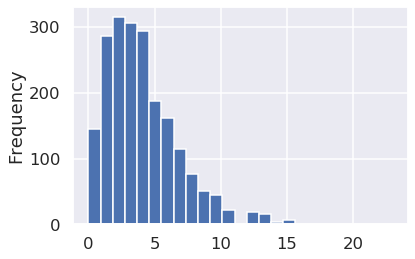

In [10]:
# Distribution of Critical Violations
plt.figure()
new_df.crit.plot.hist(bins=25)
f1 = plt.gcf()

This distribution suggests that the average number of critical violations found at a given restaurant is fairly low, which is ideal. However, the fact that the mean is roughly 3-4 violations is concerning, since in San Diego that would lower a restaurant to at most a B grade. However this is North Carolina, and our upcoming data will provide some more insight.

I'm not only interested in critical violations though, so let's look at the distribution of non-critical violations next.

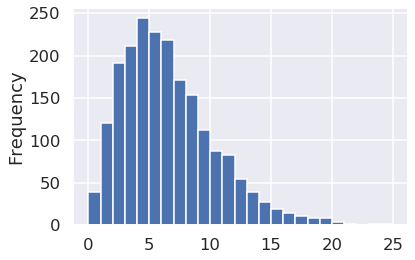

In [11]:
# Distribution of Non-Critical Violations
plt.figure()
new_df.non_crit.plot.hist(bins=25)
f1 = plt.gcf()

While this distribution suggests that the average number of non-critical violations is higher than critical ones, the mean is still relatively low, which is also ideal. Non-critical violations are often require small corrections that should not lay a great deal of concern on the quality of the restaurant's health conditions.

Now I'll look at the distribution of score deductions. It will be interesting to see how these average critical and non-critical violation counts deduct points from a restaurant's overall score.

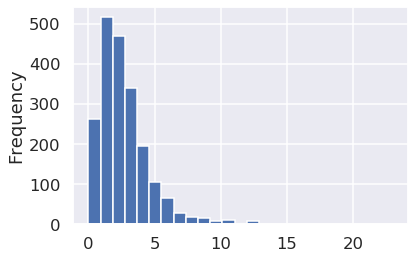

In [12]:
# Distribution of Score Deductions
plt.figure()
new_df.deduction.plot.hist(bins=25)
f1 = plt.gcf()

The result here is concerning. For an average of 3-4 critical violations and an average of 5-6 non-critical violations, the average amount of points deducted is only about 1-2? This seems like a rather small amount, in my estimation. To hopefully confirm this, I'll take a look at the total score distributions:

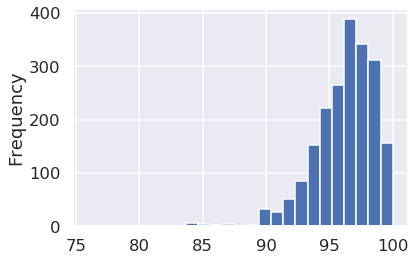

In [13]:
# Distribution of Final Scores
plt.figure()
new_df.score.plot.hist(bins=25)
f1 = plt.gcf()

As I mentioned in the Background Work section, the majority of restaurants receive an A letter grade. This leads to an understandable amount of skepticism, and looking at the numbers of the violations we now have cause for concern. If any given restaurant can violate a number of critical health codes and still receive an A, then it is likely that the health inspection rubric does not accurately represent the health conditions of a facility.

To look at some of the relationships between these variables, I'll use a scatter matrix::

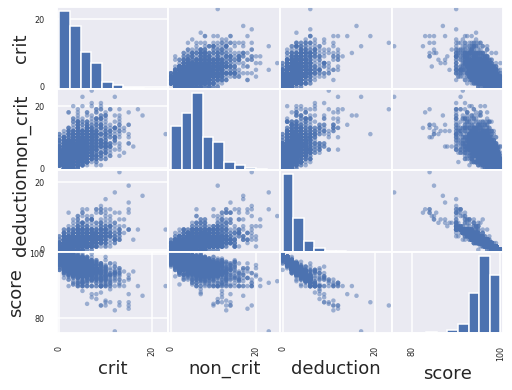

In [18]:
hold = new_df.drop(columns=['hsisid','restaurant name','core','priority','p_foundation'])
pd.plotting.scatter_matrix(hold,figsize=(8,6))
f1 = plt.gcf()

Looking at this suggests some interesting relationships. When we consider critical violations vs deduction, it's clear that on average critical violations do not lead to a high deduction amount, and neither do non-critical violations (though that's to be expected). I'd like to focus on the comparison of score vs. critical violations a bit closer:

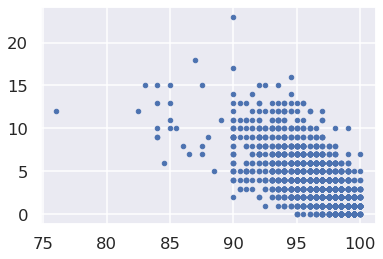

In [15]:
# Plot score against number of critical violations
f, ax = plt.subplots()
ax.plot(new_df.score, new_df.crit , '.')
x = np.arange(18,81)
f5 = plt.gcf()

This shows that a restaurant can receive around 10 critical violations and still receive an A grade. This fact is rather concerning and confirms that there is a strong possibility of inaccuracy when it comes to the health inspection scoring system. It's worth noting that any restaurant in San Diego with 4 critical violations would result in a B grade at most.

An interesting factor I noticed in the violations data was a categorical variable, 'severity.' As mentioned in the background work, there are three degrees of violation severity: core, priority foundation, and priority. I wanted to see if there was a correlation between the severity count of the violations and the final scores, since it arguably would not be enough to only consider whether a violation is critical or not.

The following degrees of severity will be displayed from least to most: Core violations, Priority Foundation violations, and Priority violations.

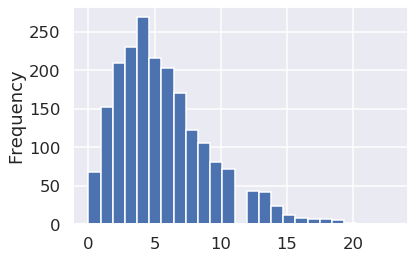

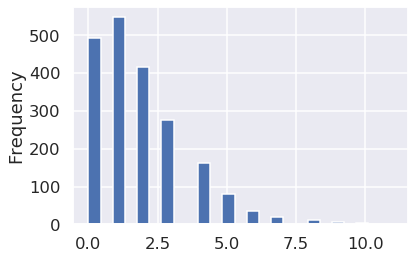

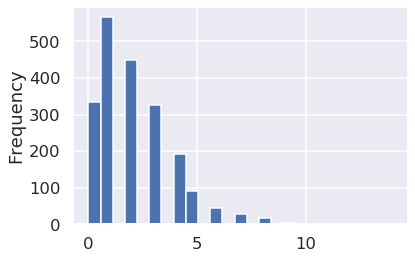

In [16]:
# Distribution of Severity of Violations
# Core violations
plt.figure()
new_df.core.plot.hist(bins=25)
f1 = plt.gcf()

# Priority Violations
plt.figure()
new_df.priority.plot.hist(bins = 25)
f2 = plt.gcf()

# Priority Foundation Violations
plt.figure()
new_df.p_foundation.plot.hist(bins=25)
f3 = plt.gcf()

From these distributions, we can see that the most common violations are Core violations, with fewer violations being Priority Foundation and even fewer Priority. With this information in hand, it seems that we have a reasonable explanation for the small deductions in inspections scores: the score is not directly tied to the amount of critical or non-critical violations, but the severity of said violations.

# Ethics and Privacy
Leading up to this project, the initial ethical considerations were as follows:

When discussing the ethics of this data assignment, the foremost matter to handle is privacy and permissions. Seeing as health code inspection grades and reports are public information, and can easily be looked up by any person, there should be no issue in terms of permissions for the data. Currently there are also some amounts of food inspection datasets available to the public without restrictions as well. Furthermore, seeing as we will be handling a minimal amount of user experiences, there shouldn't be any concerns in regards to identifiable data. However, should any restaurant or user elect to not want their information released in this project, then they will naturally be removed from the data. 

While we have obtained all proper permissions for these datasets, it is apparent on inspection that there is a host of personal information listed in them, such as phone numbers and zip codes with large populations. As a result, these particular features are scrubbed and dropped from the datasets in the use of this project as to not violate any ethical boundaries.

# Conclusion

The goal of this project was to take a look at the restaurant health inspection process and see if there are ways to improve it. Early research led me to ask the question: is the scoring system as accurate as it should be in order to preserve public health? To answer this question, I was provided restaurant listings as well as health inspection and violation reports. By cross-referencing these data tables and putting them into one dataframe, I was able to judge the accuracy of these health inspections.

In my analysis, I found that a surprising number of critical violations can be found in an average restaurant and still receive an A letter grade. It also seemed that any given critical violation did not have a strong effect on the amount of points deducted from a restaurant's score. However, when I looked at the severity of these violations, some more insight was provided - the average number of rather severe violations is low, only about 1 in any given restaurant. This better explains how a restaurant loses points: if a violation, critical or non-critical, is severe enough, then a larger amount of points will be deducted from the overall score. However, the vast majority of restaurants still receive an A letter grade, confirming that there are still inaccuracies in the health inspection process - perhaps just not as severe as I originially anticipated.

The benefit of this project towards society is to hopefully improve the health inspection process that restaurants go through. By scrutinizing the scores, inspections, and violations available, we can determine if the process is accurate and is living up to its purpose in preserving public health. If the process does not properly convey the health conditions of the inspected restaurant, then we are not protecting the health of the public as we should be. 